# Exploring Data with R

The first task is to get data into our R environment. Data can be added in several ways including:

•	Importing .csv or JSON from local source or API

•	Direct connections to rational databases or clusters

•	Packaged “RData” files

In the examples below, we will be working with data from the Baseball Databank described below.

In [2]:
# Load the local data set.
load("lahman.RData")

# Take a look at the first few rows.
head(batting)

nameFirst,nameLast,playerID,yearID,stint,G,AB,R,H,X2B,⋯,BB,SO,IBB,HBP,SH,SF,GIDP,teamID,name,lgID
Frank,Abercrombie,abercda01,1871,1,1,4,0,0,0,⋯,0,0,NA,NA,NA,NA,NA,TRO,Troy Haymakers,NA
Bob,Addy,addybo01,1871,1,25,118,30,32,6,⋯,4,0,NA,NA,NA,NA,NA,RC1,Rockford Forest Citys,NA
Art,Allison,allisar01,1871,1,29,137,28,40,4,⋯,2,5,NA,NA,NA,NA,NA,CL1,Cleveland Forest Citys,NA
Doug,Allison,allisdo01,1871,1,27,133,28,44,10,⋯,0,2,NA,NA,NA,NA,NA,WS3,Washington Olympics,NA
Cap,Anson,ansonca01,1871,1,25,120,29,39,11,⋯,2,1,NA,NA,NA,NA,NA,RC1,Rockford Forest Citys,NA
Robert,Armstrong,armstbo01,1871,1,12,49,9,11,2,⋯,0,1,NA,NA,NA,NA,NA,FW1,Fort Wayne Kekiongas,NA


Three data frames are now loaded into your R environment. In RStudio, these would appear in the upper right-hand corner. The data frames loaded are:

•	batting: Annual batting statistics for every MLB player form 1871 to 2016.

•	pitching: Annual pitching statistics for every MLB player form 1871 to 2016.

•	master: A key table to help us with joins.

We can view the first several rows of these data with the code below.

# Parsing and Sub-setting Data

One of the most popular R packages for working with data frames is the dplyr package. We can use dplyr in the following code to subset the data frame.

Suppose we wanted to only see full-time batters. We could subset the data frame to batters with more than 80 games played in a season.

In [3]:
# Packages are normally called at the beginning of your code.
library(dplyr)

# Subset for rows where games (G) are more than 80.
batting_fulltime <- subset(batting, G > 80)

# View the results to check. Notice these rows all have 80+ in the "G" column.
head(batting_fulltime)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,nameFirst,nameLast,playerID,yearID,stint,G,AB,R,H,X2B,⋯,BB,SO,IBB,HBP,SH,SF,GIDP,teamID,name,lgID
555,Tom,Carey,careyto01,1875,1,86,382,63,101,6,⋯,1,3,NA,NA,NA,NA,NA,HR1,Hartford Dark Blues,NA
582,Bob,Ferguson,fergubo01,1875,1,85,366,65,88,10,⋯,3,5,NA,NA,NA,NA,NA,HR1,Hartford Dark Blues,NA
655,Cal,McVey,mcveyca01,1875,1,82,389,89,138,36,⋯,1,5,NA,NA,NA,NA,NA,BS1,Boston Red Stockings,NA
688,Jack,Remsen,remseja01,1875,1,86,358,70,96,10,⋯,5,4,NA,NA,NA,NA,NA,HR1,Hartford Dark Blues,NA
735,Tom,York,yorkto01,1875,1,86,375,68,111,14,⋯,3,6,NA,NA,NA,NA,NA,HR1,Hartford Dark Blues,NA
1050,Jack,Burdock,burdoja01,1879,1,84,359,64,86,10,⋯,9,28,NA,NA,NA,NA,NA,BSN,Boston Red Caps,NL


# Piping Functions

R has no native pipe operator. However, in many packages the `%>%` symbol serves as a pipe operator. 

For example, the below sections of code will both select batters with more than 80 games and arrange them by the number of homeruns (decending) in a particular season.

In [4]:
# Code without pipe
batting_fulltime <- subset(batting, G > 80)
batting_fulltime <- arrange(batting, desc(HR))

# Code with pipes looks a bit cleaner. Note, there is no need to call the data frame in the arrange function.
batting_fulltime <- subset(batting, G > 80) %>%
    arrange(desc(HR))

# Check the results. We should see Barry Bonds on top of the list with 73 homeruns in 2001.
head(batting_fulltime)

nameFirst,nameLast,playerID,yearID,stint,G,AB,R,H,X2B,⋯,BB,SO,IBB,HBP,SH,SF,GIDP,teamID,name,lgID
Barry,Bonds,bondsba01,2001,1,153,476,129,156,32,⋯,177,93,35,9,0,2,5,SFN,San Francisco Giants,NL
Mark,McGwire,mcgwima01,1998,1,155,509,130,152,21,⋯,162,155,28,6,0,4,8,SLN,St. Louis Cardinals,NL
Sammy,Sosa,sosasa01,1998,1,159,643,134,198,20,⋯,73,171,14,1,0,5,20,CHN,Chicago Cubs,NL
Mark,McGwire,mcgwima01,1999,1,153,521,118,145,21,⋯,133,141,21,2,0,5,12,SLN,St. Louis Cardinals,NL
Sammy,Sosa,sosasa01,2001,1,160,577,146,189,34,⋯,116,153,37,6,0,12,6,CHN,Chicago Cubs,NL
Sammy,Sosa,sosasa01,1999,1,162,625,114,180,24,⋯,78,171,8,3,0,6,17,CHN,Chicago Cubs,NL


### PRACTICE

Complete the code chunk below to select only years after 1900 and arrange the data by yearID descending. Insert R Cell code text section.

In [ ]:
# Hint: Don't forget to include the desc() function inside of the arrange function.

batting_years <- subset(batting_fulltime, YOUR_CODE_HERE) %>%
      arrange(YOUR CODE HERE)

# Mathematical Equations

Math is fairly straightforward in R. The “batting average” statistic does not appear in our `batting_fulltime` data frame. To add a column, we can use the `$` symbol.

In [5]:
# The formula for batting average is (hits/at-bats).

# Subset the data to players with more than 80 games AND select only the stats we need.
# Notice the "c(...)" in the select statement. Think of this as a sting concatenate. 

battingAVG <- subset(batting, G > 80, select = c("nameFirst", "nameLast", "yearID", "G",
                                                 "AB", "H", "SO"))

# Use the $ symbol to add a column to the data frame called "BA."
battingAVG$BA <- battingAVG$H / battingAVG$AB

# Check the data to make sure our column was added and calculated correctly.
head(battingAVG)

,nameFirst,nameLast,yearID,G,AB,H,SO,BA
555,Tom,Carey,1875,86,382,101,3,0.2643979
582,Bob,Ferguson,1875,85,366,88,5,0.2404372
655,Cal,McVey,1875,82,389,138,5,0.3547558
688,Jack,Remsen,1875,86,358,96,4,0.2681564
735,Tom,York,1875,86,375,111,6,0.2960000
1050,Jack,Burdock,1879,84,359,86,28,0.2395543


### PRACTICE

In [ ]:
Add a column to the battingAVG data frame that calculates strikeout percentate. HINT: the formula for strikeout percentate is SO / AB

In [ ]:
# Use the $ symbol to add a column to the data frame called "SOpct."

battingAVG$SOpct <- 

# Check to make sure your column has been added.

head(battingAVG)

# Aggregating Data

These data represent yearly statistics, but suppose we wanted to see career statistics. For example, if we wanted to look at a list of the career homerun leaders in baseball. 

In [6]:
library(dplyr)
# Subset data to years after 1900 and players with at least one homerun in a season.
# Select only the fields we need: name, playerID and HR.

careerHR <- subset(batting, yearID >= 1900 & HR >= 1,
                   select = c("playerID", "nameFirst", "nameLast", "HR")) %>%
    # Group any fields not being used in the aggregation.
    group_by(playerID, nameFirst, nameLast) %>%
    # Use the summarize function from dplyr.
    summarize(HR = sum(HR)) %>%
    # Arrange descending.
    arrange(desc(HR))

# If we did this correctly, Barry Bonds should be at the top of the list.
head(careerHR)

playerID,nameFirst,nameLast,HR
bondsba01,Barry,Bonds,762
aaronha01,Hank,Aaron,755
ruthba01,Babe,Ruth,714
rodrial01,Alex,Rodriguez,687
mayswi01,Willie,Mays,660
griffke02,Ken,Griffey,630


# Plots

In [7]:
# Aggregate total homeruns hit by all players over various years.
hitEnviron <- subset(batting, yearID >= 1900 & HR >= 1, 
                     select = c("yearID", "HR")) %>%
    group_by(yearID) %>%
    summarise(HR = sum(HR)) %>%
    arrange(yearID)

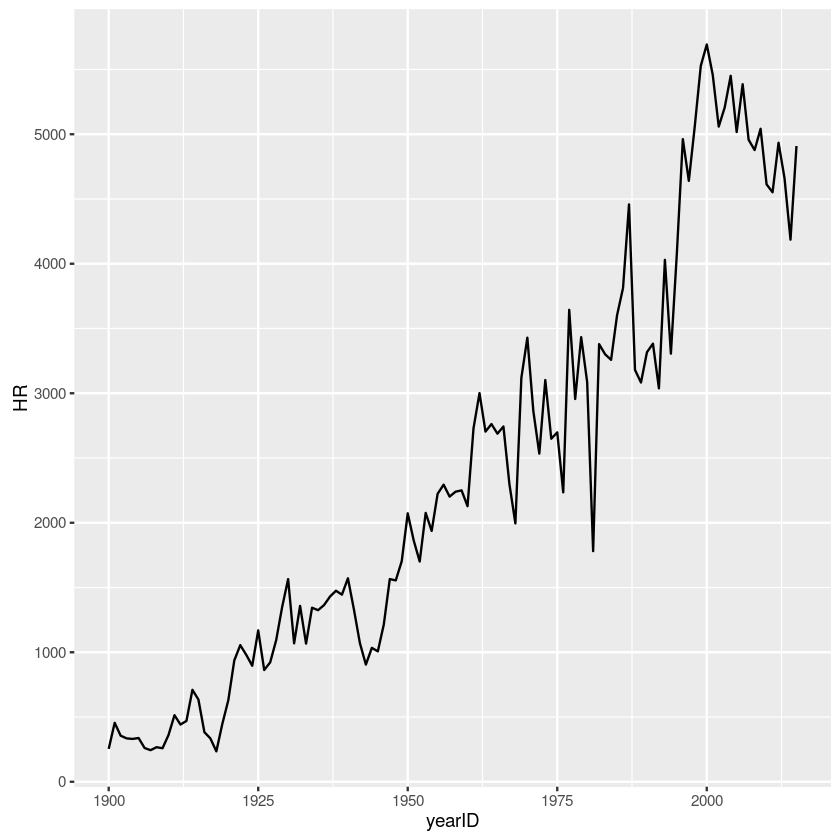

In [9]:
library(ggplot2)

ggplot(hitEnviron, aes(x = yearID, y= HR)) +
    geom_line()